# Simulación de evento y reconstrucción de trayectorias en Toy Model

### Importaciones

In [2]:
import proyecto.eventos.eventos as modelo
import proyecto.reconstruccion.principal as principal
import numpy as np

In [3]:
import proyecto.reconstruccion.Q_Grover as Grover

In [4]:
from qiskit.primitives import Sampler

### Configuración de detector y generador

Configuraciones de detector

In [5]:
N_MODULOS = 4
LX = float("+inf")
LY = float("+inf")
ESPACIADO_Z = 1.0

detector = modelo.Geometria_detector(
    id_modulos=list(range(N_MODULOS)),
    lx=[LX] * N_MODULOS,
    ly=[LY] * N_MODULOS,
    z=[i + ESPACIADO_Z for i in range(N_MODULOS)]
)


detector

Geometria_detector(id_modulos=[0, 1, 2, 3], lx=[inf, inf, inf, inf], ly=[inf, inf, inf, inf], z=[1.0, 2.0, 3.0, 4.0])

Generador de eventos

In [6]:
generador = modelo.Generador(
    geometria_detector=detector,
    theta_max=np.pi / 6
)

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

### Generación y visualización de evento 

In [8]:
N_PARTICULAS = 3
evento = generador.generar_evento(N_PARTICULAS)

[Impacto(id_impacto=0, x=np.float64(0.17846001675016815), y=np.float64(-0.25813354471651445), z=1.0, id_modulo=0, id_rastro=0), Impacto(id_impacto=4, x=np.float64(0.09347086878095763), y=np.float64(0.3928456327760326), z=1.0, id_modulo=0, id_rastro=1), Impacto(id_impacto=8, x=np.float64(-0.08966883166770971), y=np.float64(-0.5067644064370885), z=1.0, id_modulo=0, id_rastro=2), Impacto(id_impacto=1, x=np.float64(0.3569200335003363), y=np.float64(-0.5162670894330289), z=2.0, id_modulo=1, id_rastro=0), Impacto(id_impacto=5, x=np.float64(0.18694173756191526), y=np.float64(0.7856912655520653), z=2.0, id_modulo=1, id_rastro=1), Impacto(id_impacto=9, x=np.float64(-0.17933766333541942), y=np.float64(-1.013528812874177), z=2.0, id_modulo=1, id_rastro=2), Impacto(id_impacto=2, x=np.float64(0.5353800502505044), y=np.float64(-0.7744006341495433), z=3.0, id_modulo=2, id_rastro=0), Impacto(id_impacto=6, x=np.float64(0.2804126063428729), y=np.float64(1.178536898328098), z=3.0, id_modulo=2, id_rastro=

Visualización

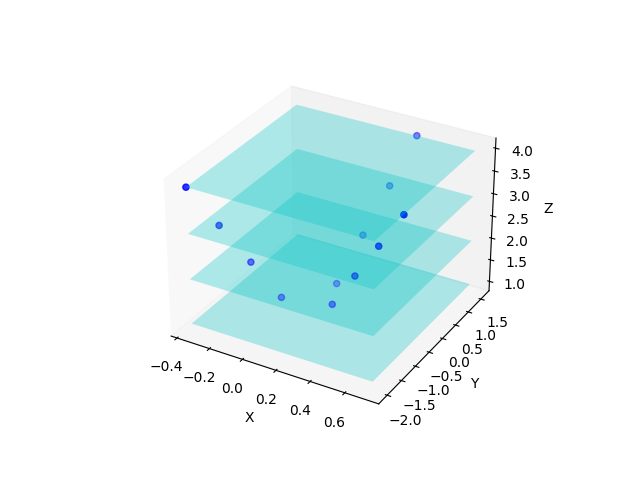

In [9]:
generador.visualizar(evento)

### Hamiltoniano y solucion

In [10]:
ham = principal.HamiltonianoSimple(epsilon=1e-7,gamma=2.0,delta=1.0)

In [11]:
ham.construir_hamiltoniano(evento)

(<Compressed Sparse Column sparse matrix of dtype 'float64'
 	with 39 stored elements and shape (27, 27)>,
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [12]:
qp,A,b=ham.hamiltoniano_dp(evento=evento)

In [17]:
grover_GAS=Grover.GroverOptimizer(6, num_iterations=10, sampler=Sampler())

C:\Users\rojas\AppData\Local\Temp\ipykernel_16644\3692686281.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  grover_GAS=Grover.GroverOptimizer(6, num_iterations=10, sampler=Sampler())


In [18]:
results = grover_GAS.solve(qp,A,b)

c:\Users\rojas\Videos\Implementacion 2\proyecto\eventos\eventos.py:123: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot([j.x, k.x], [j.y, k.y], [j.z, k.z], 'r-', color='red', linewidth=0.7)


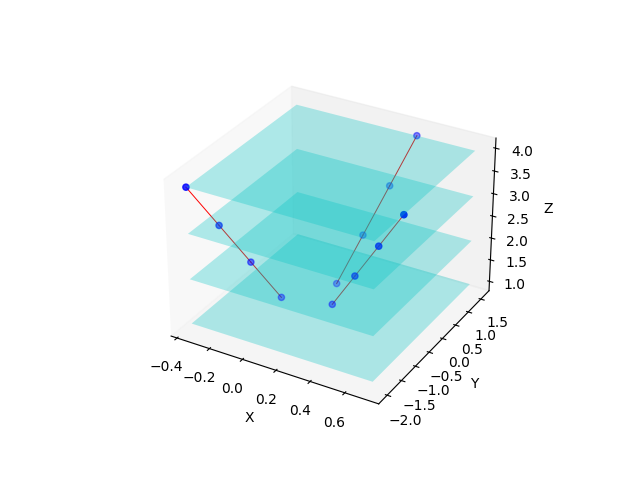

In [19]:
generador.visualizar_solucion(evento,results)